In [1]:
import torch
import numpy as np
import csv
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [3]:
with open("C:/Users/User/Documents/Machine Learning/social listening project/tf_idf.csv", encoding="utf-8") as f:
    # đọc file vector, đưa về dạng array[float]
    reader = csv.reader(f)
    data_list = [row for row in reader]
    data_list = np.asarray(data_list, dtype=np.float64)
    # chia thành các tập 
    vector_training_set = np.array([i for i in data_list[:4000]])
    vector_validation_set = np.array([i for i in data_list[4001:5500]])
    vector_test_set = np.array([i for i in data_list[5501:]])
f.close()

In [4]:
#chuyen array ve tensor
data_list=torch.tensor(data_list,dtype=torch.float64)
vector_training_set=torch.tensor(vector_training_set,dtype=torch.float64)
vector_validation_set=torch.tensor(vector_validation_set,dtype=torch.float64)
vector_test_set=torch.tensor(vector_test_set,dtype=torch.float64)

C:\Users\User\AppData\Local\Temp\ipykernel_10052\3179549242.py:2: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  data_list=torch.tensor(data_list,dtype=torch.float64)


In [5]:
with open("C:/Users/User/Documents/Machine Learning/social listening project/Data dùng được.csv", encoding="utf-8") as f:
    reader = csv.reader(f)
    label_list = [row for row in reader]
    # 0 = Ukraina and 1 = Nga
    for i in range(0,len(label_list)):
        if label_list[i][1]=="U":
            label_list[i]=0
        else: 
            label_list[i]=1
    # chia thành các tập
    label_training_set = [i for i in label_list[:4000]]
    label_validation_set = [i for i in label_list[4001:5500]]
    label_test_set = [i for i in label_list[5501:]]
f.close()

In [6]:
#chuyen array ve tensor
label_list=torch.tensor(label_list,dtype=torch.float64)
label_training_set=torch.tensor(label_training_set,dtype=torch.float64)
label_validation_set=torch.tensor(label_validation_set,dtype=torch.float64)
label_test_set=torch.tensor(label_test_set,dtype=torch.float64)

In [7]:
X_train = vector_training_set
# thêm hệ số bias
X_train = torch.hstack((torch.ones(len(X_train),1), X_train))
y_train = label_training_set

In [8]:
X_val = vector_validation_set
# thêm hệ số bias
X_val = torch.hstack((torch.ones(len(X_val),1), X_val))
y_val = label_validation_set

In [9]:
X_test = vector_test_set
# thêm hệ số bias
X_test = torch.hstack((torch.ones(len(X_test),1), X_test))
y_test = label_test_set

In [10]:
def sigmoid(s):
    return (1/(1 + 1e-6 + torch.exp(-s)))

In [11]:
def loss_function(w,X_train,y_train):
    z = sigmoid(torch.matmul(w,torch.transpose(X_train,0,1)))
    loss = torch.sum(-(y_train*torch.log(z)+(1-y_train)*torch.log(1-z)))
    return loss

In [12]:

def logistic_sigmoid_regression(X_train, y_train, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    # vector trọng số
    #it = 0
    N = X_train.shape[0]  # số đối tượng
    count = 0   # đến số vong lặp
    check_w_after = 20  # check lại w sau mỗi 20 lần lặp
    loss_list = []
    count_list = []
    for j in range(0,max_count):
        # mix data 
        mix_id = torch.randperm(N)
        # cập nhật w sau mỗi vòng lặp
        for i in mix_id:
            xi = X_train[i]
            yi = y_train[i]
            zi = sigmoid(torch.dot(w[-1],xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # điều kiện dừng vòng lặp
            if count%check_w_after == 0:     
                loss_list.append(loss_function(w_new,X_train,y_train))  
                count_list.append(count)
                if torch.linalg.norm(w_new - w[-check_w_after])<tol:
                    return w[-1],loss_list,count_list
            w.append(w_new)
    return w[-1],loss_list,count_list

In [13]:
eta = .005   # learning rate = 0.01
d = X_train.shape[1]
w_init = torch.randn(d,dtype=torch.float64)  # lấy random một vector w
w, loss_list, count_list = logistic_sigmoid_regression(X_train, y_train, w_init, eta)
w = w.reshape((1,-1))

In [ ]:
loss = []

In [ ]:
for i in range(0,len(loss_list)):
    loss.append(loss_list[i].item())

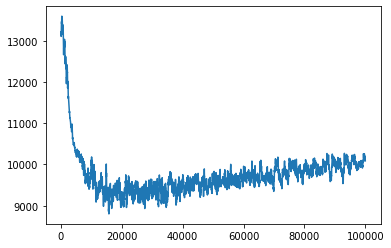

In [ ]:
plt.plot(count_list,loss)

In [ ]:
predict = sigmoid(torch.matmul(w,torch.transpose(X_test,0,1)))
count = 0
for i in range(0,len(predict[0])):
    x = predict[0][i]
    y = y_test[i]
    s = x + y
    if (x + y >=1.5) or (x + y <0.5):
        count+=1
    #print("%.4f" %predict[0][i],y_test[i])
print(count)
print(len(y_test))
print(count/len(y_test))